# Introduction to Pandas

*pandas* is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language. It is already well on its way toward this goal.

*pandas* is well suited for many different kinds of data:

  - Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
  - Ordered and unordered (not necessarily fixed-frequency) time series data.
  - Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
  - Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure

The two primary data structures of pandas, **Series** (1-dimensional) and **DataFrame** (2-dimensional), handle the vast majority of typical use cases in finance, statistics, social science, and many areas of engineering. For R users, **DataFrame** provides everything that R’s data.frame provides and much more. *pandas* is built on top of *NumPy* and is intended to integrate well within a scientific computing environment with many other 3rd party libraries.

Here are just a few of the things that pandas does well:

  - Easy handling of missing data (represented as NaN) in floating point as well as non-floating point data
  - Size mutability: columns can be inserted and deleted from DataFrame and higher dimensional objects
  - Automatic and explicit data alignment: objects can be explicitly aligned to a set of labels, or the user can simply ignore the labels and let Series, DataFrame, etc. automatically align the data for you in computations
  - Powerful, flexible group by functionality to perform split-apply-combine operations on data sets, for both aggregating and transforming data
  - Make it easy to convert ragged, differently-indexed data in other Python and NumPy data structures into DataFrame objects
  - Intelligent label-based slicing, fancy indexing, and subsetting of large data sets
  - Intuitive merging and joining data sets
  - Flexible reshaping and pivoting of data sets
  - Hierarchical labeling of axes (possible to have multiple labels per tick)
  - Robust IO tools for loading data from flat files (CSV and delimited), Excel files, databases, and saving / loading data from the ultrafast HDF5 format
  - Time series-specific functionality: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging, etc.

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


## Demonstation of pandas on Titanic dataset

Read data from csv

In [2]:
df = pd.read_csv('titanic.csv')

Get some information about dataset 

In [3]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [4]:
df.shape

(891, 15)

In [5]:
df.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null object
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null object
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.3+ KB


In [7]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Selecting data

In [8]:
df['age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17      NaN
18     31.0
19      NaN
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26      NaN
27     19.0
28      NaN
29      NaN
       ... 
861    21.0
862    48.0
863     NaN
864    24.0
865    42.0
866    27.0
867    31.0
868     NaN
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878     NaN
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, dtype: float64

In [9]:
df.age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17      NaN
18     31.0
19      NaN
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26      NaN
27     19.0
28      NaN
29      NaN
       ... 
861    21.0
862    48.0
863     NaN
864    24.0
865    42.0
866    27.0
867    31.0
868     NaN
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878     NaN
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, dtype: float64

## Selecting with conditions

In [10]:
df.age[df.age > 35]

1      38.0
6      54.0
11     58.0
13     39.0
15     55.0
25     38.0
30     40.0
33     66.0
35     42.0
40     40.0
52     49.0
54     65.0
61     38.0
62     45.0
92     46.0
94     59.0
96     71.0
104    37.0
108    38.0
110    47.0
116    70.5
124    54.0
129    45.0
132    47.0
137    37.0
148    36.5
149    42.0
150    51.0
152    55.5
153    40.5
       ... 
761    41.0
763    36.0
765    51.0
771    48.0
772    57.0
774    54.0
779    43.0
789    46.0
795    39.0
796    49.0
806    39.0
808    39.0
811    39.0
818    43.0
820    52.0
822    38.0
829    62.0
835    39.0
845    42.0
851    74.0
854    44.0
856    45.0
857    51.0
860    41.0
862    48.0
865    42.0
871    47.0
873    47.0
879    56.0
885    39.0
Name: age, dtype: float64

In [11]:
df[df.age > 35]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
13,0,3,male,39.0,1,5,31.2750,S,Third,man,True,NaN,Southampton,no,False
15,1,2,female,55.0,0,0,16.0000,S,Second,woman,False,NaN,Southampton,yes,True
25,1,3,female,38.0,1,5,31.3875,S,Third,woman,False,NaN,Southampton,yes,False
30,0,1,male,40.0,0,0,27.7208,C,First,man,True,NaN,Cherbourg,no,True
33,0,2,male,66.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
35,0,1,male,42.0,1,0,52.0000,S,First,man,True,NaN,Southampton,no,False
40,0,3,female,40.0,1,0,9.4750,S,Third,woman,False,NaN,Southampton,no,False


In [12]:
df[['age', 'survived']][20:50]

,age,survived
20,35.0,0
21,34.0,1
22,15.0,1
23,28.0,1
24,8.0,0
25,38.0,1
26,NaN,0
27,19.0,0
28,NaN,1
29,NaN,0


## Counting

In [13]:
df[df.survived == 1].count()

survived       342
pclass         342
sex            342
age            290
sibsp          342
parch          342
fare           342
embarked       340
class          342
who            342
adult_male     342
deck           136
embark_town    340
alive          342
alone          342
dtype: int64

In [14]:
df.survived[df.survived == 1].count()

342

In [15]:
df['log10age'] = log10(df.age)

In [16]:
df.who.value_counts(normalize=True)

man      0.602694
woman    0.304153
child    0.093154
Name: who, dtype: float64

### Compute a simple cross-tabulation

In [17]:
pd.crosstab(df['class'], df.survived)

survived,0,1
class,,
First,80,136
Second,97,87
Third,372,119


In [18]:
df.survived[df.age < 5].value_counts()

1    27
0    13
Name: survived, dtype: int64

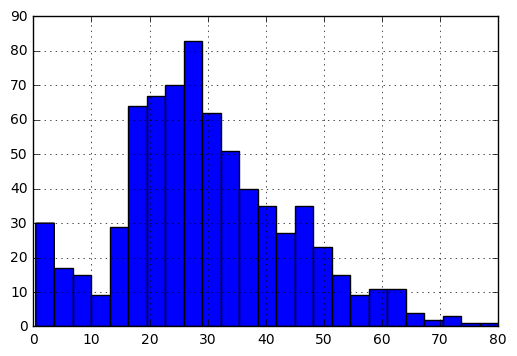

In [19]:
df.age.hist(bins=25)

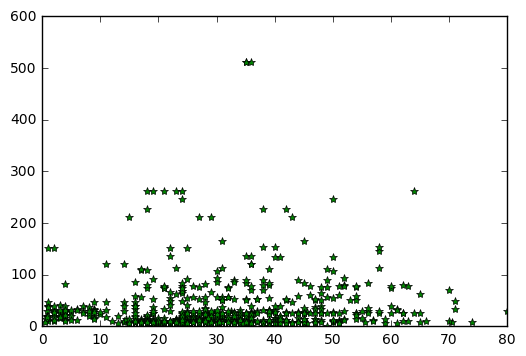

In [20]:
plot(df.age, df.fare, 'g*')

In [21]:
df.fare.sum()

28693.9493

In [22]:
df.fare[df.sex == 'male'].sum()

14727.286500000002

In [23]:
df.fare[df.sex == 'female'].sum()

13966.6628

In [24]:
df.groupby('who')['fare'].sum()

who
child     2721.2210
man      13352.0656
woman    12620.6627
Name: fare, dtype: float64